In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy as sp
from scipy import special
import matplotlib.pylab as mpl
import seaborn as sns
import statsmodels.api as sm

In [2]:
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False )

In [3]:
import warnings
warnings.filterwarnings('ignore')

## 연습문제1

1. 붓꽃 분류분제에서 클래스가 세토사와 베르시칼라 데이터만 사용하고(setosa=0, versicolor=1)
   독립변수로는 꽃받침 길이(Sepal Lenght)와 상수항만 사용하여 StatsModels 패키지의 로지스틱 회귀모형으로 
   결과를 예측하고 보고서를 출력한다. 이 보고서에서 어떤 값이 세로사와 베르시칼라를 구분하는 기준값              (threshold)으로 사용되고 있는가?
2. 위 결과를 분류결과표(confusion matrix)와 분류결과보고서(classification report)로 나타내라.
3. 이 모형에 대해 ROC커브를 그리고 AUC를 구한다. 이 때 Scikit-Learn의 LogisticRegression을 사용하지 않고 위에    서 StatsModels로 구한 모형을 사용한다.  

In [43]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
dfX = pd.DataFrame(X, columns=iris.feature_names)
dfy = pd.DataFrame(y, columns=["species"])
df = pd.concat([dfX, dfy], axis=1)
df = df[["sepal length (cm)", "species"]]
df = df[df.species.isin([0, 1])]
df = df.rename(columns={"sepal length (cm)": "sepal_length" })

In [44]:
model = sm.Logit.from_formula('species ~ sepal_length', data=df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.321056
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Wed, 02 Mar 2022   Pseudo R-squ.:                  0.5368
Time:                        19:53:50   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal_length     5.1403

In [45]:
# 기준값
(0.5 + 27.8315) / 5.1403

5.511643289302181

In [46]:
y_pred = result.predict(df.sepal_length) >= 0.5

from sklearn.metrics import confusion_matrix

confusion_matrix(df.species, y_pred)

array([[45,  5],
       [ 6, 44]], dtype=int64)

In [47]:
from sklearn.metrics import classification_report

print(classification_report(df.species, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



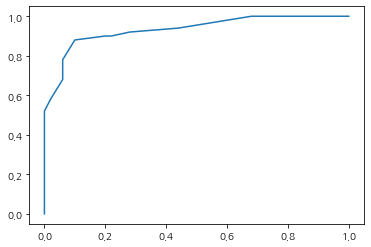

In [48]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(df.species, result.predict(df.sepal_length))
plt.plot(fpr, tpr)
plt.show()

In [49]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9326

In [ ]:
# 답

In [50]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [0, 1])
X0 = iris.data[idx, :1]
X = sm.add_constant(X0)
y = iris.target[idx]

In [51]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Wed, 02 Mar 2022   Pseudo R-squ.:                  0.5368
Time:                        19:53:56   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.8315      5.434     -5.122      0.000     -38.481     -17.182
x1             5.1403      1.007      5.107      0.000       3.168       7.113


In [52]:
logit_res.params

array([-27.83145099,   5.14033614])

In [53]:
-logit_res.params[0]/logit_res.params[1]

5.414325102571891

In [54]:
y_pred = logit_res.predict(X) >= 0.5

In [55]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[45,  5],
       [ 6, 44]], dtype=int64)

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



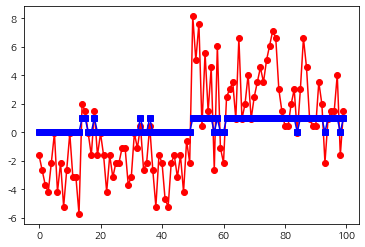

In [57]:
plt.plot(logit_res.fittedvalues, "ro-")
plt.plot(y_pred, "bs-")

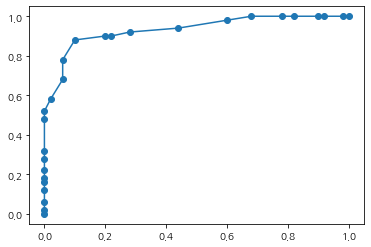

In [58]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, logit_res.fittedvalues)

plt.plot(fpr, tpr, 'o-')
plt.show()

In [11]:
data_med = sm.datasets.get_rdataset('MedGPA', package='Stat2Data')
df_med = data_med.data
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


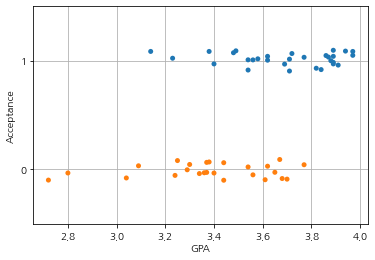

In [12]:
sns.stripplot(x='GPA', y='Acceptance', data=df_med,
             jitter=True, orient='h', order=[1,0])
plt.grid(True)
plt.show()

In [13]:
model_med = sm.Logit.from_formula("Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Wed, 02 Mar 2022   Pseudo R-squ.:                  0.5913
Time:                        17:05:34   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.

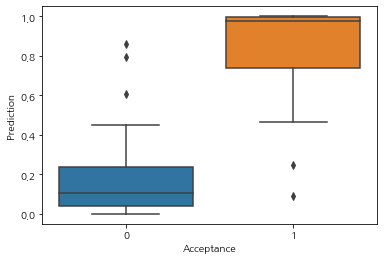

In [14]:
df_med['Prediction'] = result_med.predict(df_med)
sns.boxplot(x='Acceptance', y='Prediction', data=df_med)
plt.show()

In [15]:
model_med = sm.Logit.from_formula('Acceptance ~ PS + BS', df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.460609
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   55
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            2
Date:                Wed, 02 Mar 2022   Pseudo R-squ.:                  0.3315
Time:                        17:10:11   Log-Likelihood:                -25.333
converged:                       True   LL-Null:                       -37.896
Covariance Type:            nonrobust   LLR p-value:                 3.503e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.5427      4.684     -3.318      0.001     -24.723      -6.362
PS             0.4798      0.

## 연습 문제2

1.붓꽃 분류문제에서 클래스가 베르시칼라(versicolor)와 버지니카(virginica)데이터만 사용하여
(versicolor=1, virginica=2) 로지스틱 회귀모형으로 결과를 예측하고 보고서를 출력한다. 독립변수는 모두 사용한다. 이 보고서에서 버지니카와 베르시칼라를 구분하는 경계면의 방정식을 찾아라. 

2.위 결과를 분류결과표와 분류결과보고서로 나타내라.

3.이 모형에 대해 ROC커브를 그리고 AUG를 구하라. 이 때 Scikit-Learn의 LogisticRegression을 사용하지 않고 위에서 StatsModels로 구한 모형을 사용한다. 


In [18]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
dfX = pd.DataFrame(X, columns=iris.feature_names)
dfy = pd.DataFrame(y, columns=['species'])
df = pd.concat([dfX, dfy], axis=1)
df = df[df.species.isin([1, 2])]
df['species'] -= 1
df = df.rename(
    columns={
        "sepal length (cm)": "sepal_length",
        "sepal width (cm)": "sepal_width",
        "petal length (cm)": "petal_length",
        "petal width (cm)": "petal_width",
    })

In [20]:
model = sm.Logit.from_formula(
    'species ~ sepal_length + sepal_width + petal_length + petal_width',
    data=df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Wed, 02 Mar 2022   Pseudo R-squ.:                  0.9142
Time:                        19:19:24   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal_length    -2.465

In [21]:
y_pred = result.predict(df) >= 0.5

confusion_matrix(df.species, y_pred)

array([[49,  1],
       [ 1, 49]], dtype=int64)

In [22]:
print(classification_report(df.species, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



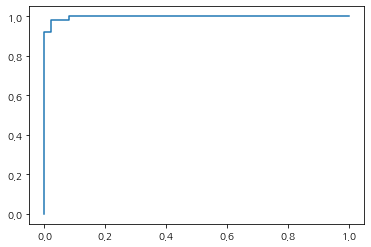

In [23]:
fpr, tpr, thresholds = roc_curve(df.species, result.predict(df))
plt.plot(fpr, tpr)
plt.show()

In [24]:
auc(fpr, tpr)

0.9972000000000001

In [ ]:
#답

In [59]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [1, 2])
X0 = pd.DataFrame(iris.data[idx, :], columns=iris.feature_names[:])
X = sm.add_constant(X0)
y = iris.target[idx] - 1

In [60]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=1)
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Wed, 02 Mar 2022   Pseudo R-squ.:                  0.9142
Time:                        19:55:45   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal l

In [61]:
y_pred = logit_res.predict(X) >= 0.5

In [62]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[49,  1],
       [ 1, 49]], dtype=int64)

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [25]:
data_wrole = sm.datasets.get_rdataset('womensrole', package='HSAUR')
df_wrole = data_wrole.data
df_wrole['ratio'] = df_wrole.agree / (df_wrole.agree + df_wrole.disagree)
df_wrole.tail()

,education,sex,agree,disagree,ratio
37,16,Female,13,115,0.101562
38,17,Female,3,28,0.096774
39,18,Female,0,21,0.000000
40,19,Female,1,2,0.333333
41,20,Female,2,4,0.333333


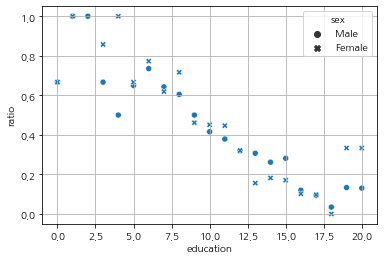

In [26]:
sns.scatterplot(x='education', y='ratio', style='sex', data=df_wrole)
plt.grid(True)
plt.show()

In [31]:
model_wrole = sm.Logit.from_formula('ratio ~ education + sex', df_wrole)
result_wrole = model_wrole.fit()
print(result_wrole.summary())

Optimization terminated successfully.
         Current function value: 0.448292
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            2
Date:                Wed, 02 Mar 2022   Pseudo R-squ.:                  0.3435
Time:                        19:42:30   Log-Likelihood:                -18.380
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 6.660e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0442      0.889      2.299      0.022       0.302       3.787
sex[T.Male]    -0.1968    

In [32]:
model_wrole2 = sm.Logit.from_formula('ratio ~ education', df_wrole)
result_wrole2 = model_wrole2.fit()
print(result_wrole2.summary())

Optimization terminated successfully.
         Current function value: 0.449186
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            1
Date:                Wed, 02 Mar 2022   Pseudo R-squ.:                  0.3422
Time:                        19:42:32   Log-Likelihood:                -18.417
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 1.202e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9345      0.781      2.478      0.013       0.405       3.464
education     -0.2117      0.

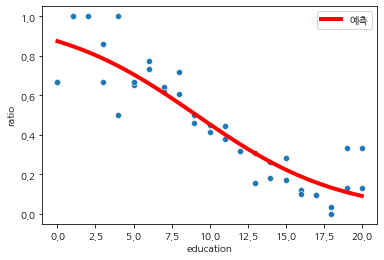

In [33]:
sns.scatterplot(x="education", y="ratio", data=df_wrole)
xx = np.linspace(0, 20, 100)
df_wrole_p = pd.DataFrame({"education": xx})
plt.plot(xx, result_wrole2.predict(df_wrole_p), "r-", lw=4, label="예측")
plt.legend()
plt.show()